# Estructura de los datos temporales

#### Leemos los datos

In [12]:
sales <- read.csv('./monthly-car-sales-in-quebec-1960.csv')
names(sales)[2] <- 'Car.Sales'

<br>

###  Stats Package

In [13]:
library('stats') # Suele venir cargado por defecto

#### Formato ts sin especificaciones temporales

In [15]:
ts.sales.1 <- ts(data = sales$Car.Sales)

#### Formato ts con fecha de inicio manual y frecuencia

In [16]:
ts.sales.2 <- ts(data = sales$Car.Sales, start = c(1960,1), frequency = 12)

#### Conversión de carácteres a fecha

In [17]:
as.Date('1960-01-01')
as.Date('1960/01/01')

[1] "1960-01-01"

[1] "1960-01-01"

#### Plotting ts.sales y ts.sales.2 (diferencias en el eje x debido a la estructuración)

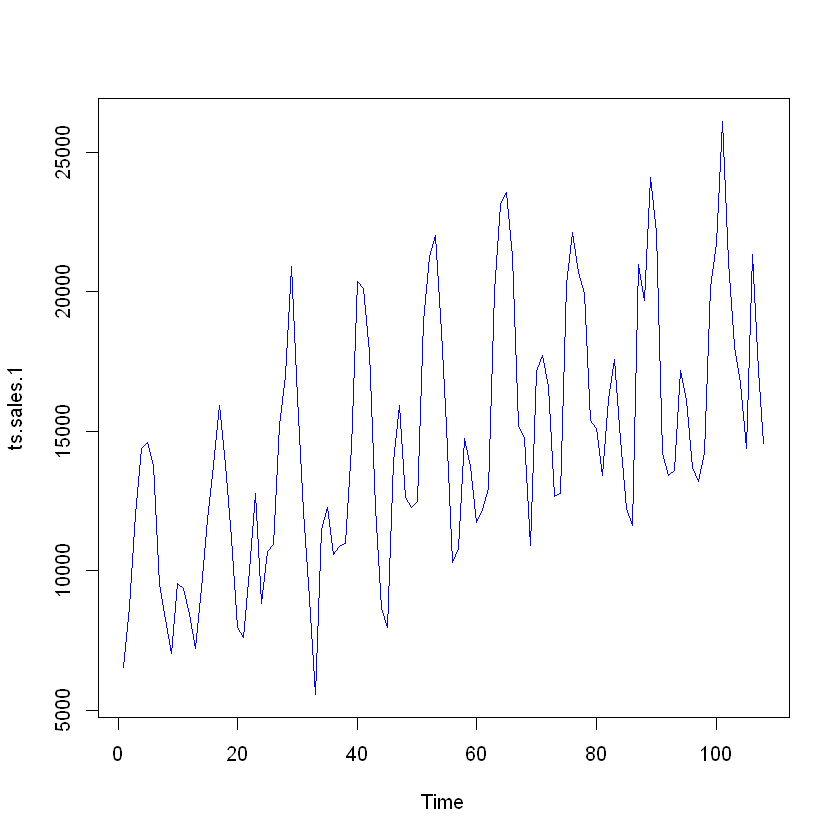

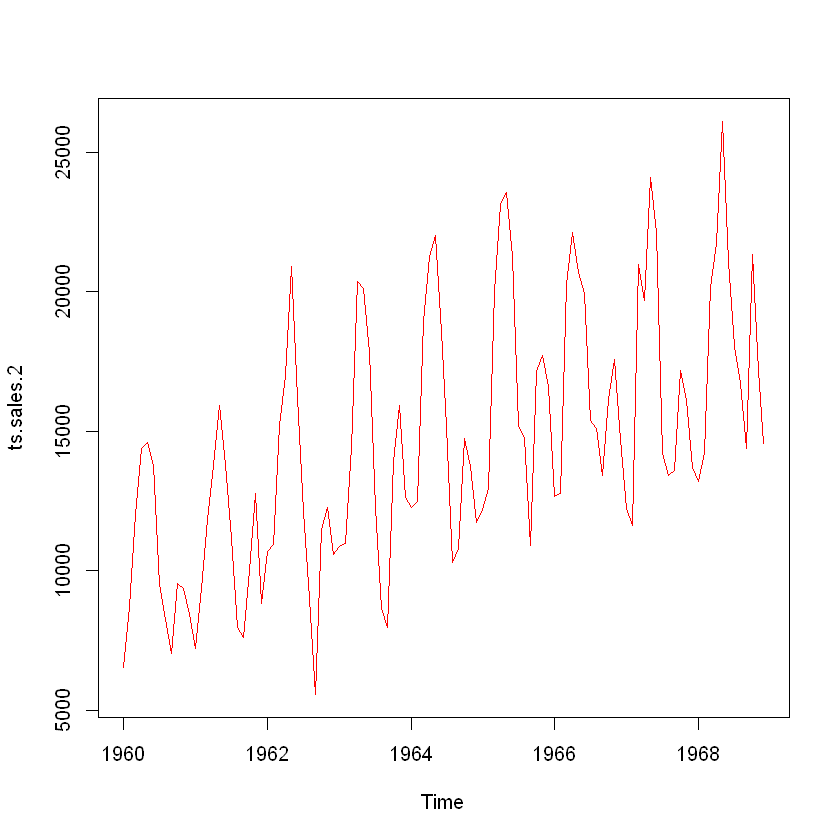

In [19]:
plot.ts(ts.sales.1, col = 'blue')
plot.ts(ts.sales.2, col = 'red')

#### Seleccionando las observaciones correspondientes a 1963

In [20]:
window(ts.sales.2, start = c(1963,1), end = c(1963,12))

       Jan   Feb   Mar   Apr   May   Jun   Jul   Aug   Sep   Oct   Nov   Dec
1963 10862 10965 14405 20379 20128 17816 12268  8642  7962 13932 15936 12628

#### Plotting del año 1963 con window

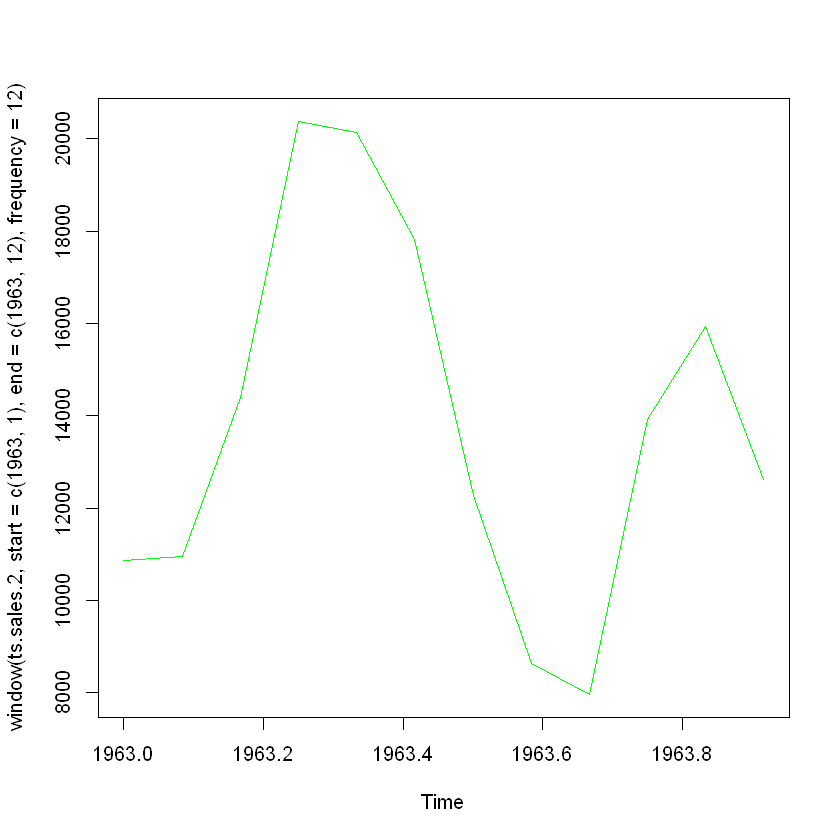

In [21]:
plot.ts(window(ts.sales.2, start = c(1963,1), end = c(1963,12), frequency = 12), col = 'green')

#### Uniendo dos series en un mismo objeto

[1] "mts"    "ts"     "matrix"

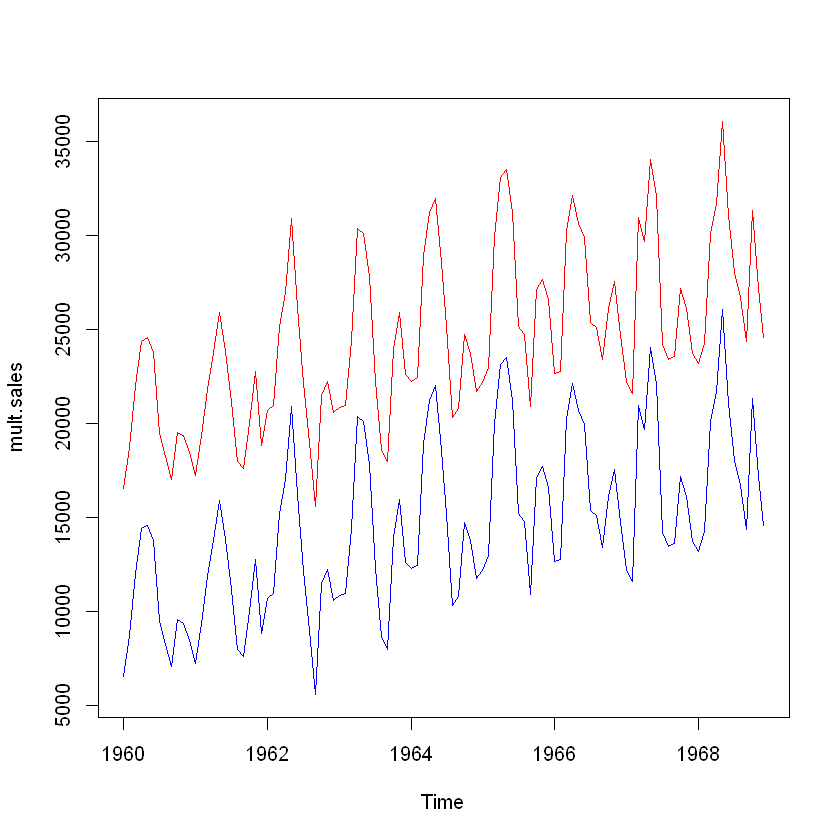

In [22]:
ts.sales.3 <- ts.sales.2 + 10000
mult.sales <- cbind(ts.sales.2, ts.sales.3)
class(mult.sales) # mts
plot(mult.sales, plot.type = 'single', col = c('blue', 'red'))

<br>

### Zoo Package

In [74]:
#install.packages('zoo')
library(zoo)

#### Formato zoo con frecuencia mensual

In [24]:
zoo.sales.1 <- zoo(x = sales$Car.Sales, frequency = 12)

#### Formato zoo con sequencia de fechas

In [25]:
dt <- seq.Date(from = as.Date('1960-01-01'), to = as.Date('1968-12-01'), by = 'month')
zoo.sales.2 <- zoo(x = sales$Car.Sales, order.by = dt)

#### Conversión de ts a zoo

In [26]:
ts.zoo.sales <- as.zoo(ts.sales.2)

#### Generando fechas mensuales y cuatrimestrales

In [29]:
as.yearmon('1960-01-01')


[1] "ene. 1960"

In [30]:
as.yearqtr('2017-2')

[1] "2017 Q2"

#### Seleccionando el índice y los datos de nuestro objeto zoo

In [31]:
index(zoo.sales.2)

[1] "1960-01-01" "1960-02-01" "1960-03-01" "1960-04-01" "1960-05-01"
  [6] "1960-06-01" "1960-07-01" "1960-08-01" "1960-09-01" "1960-10-01"
 [11] "1960-11-01" "1960-12-01" "1961-01-01" "1961-02-01" "1961-03-01"
 [16] "1961-04-01" "1961-05-01" "1961-06-01" "1961-07-01" "1961-08-01"
 [21] "1961-09-01" "1961-10-01" "1961-11-01" "1961-12-01" "1962-01-01"
 [26] "1962-02-01" "1962-03-01" "1962-04-01" "1962-05-01" "1962-06-01"
 [31] "1962-07-01" "1962-08-01" "1962-09-01" "1962-10-01" "1962-11-01"
 [36] "1962-12-01" "1963-01-01" "1963-02-01" "1963-03-01" "1963-04-01"
 [41] "1963-05-01" "1963-06-01" "1963-07-01" "1963-08-01" "1963-09-01"
 [46] "1963-10-01" "1963-11-01" "1963-12-01" "1964-01-01" "1964-02-01"
 [51] "1964-03-01" "1964-04-01" "1964-05-01" "1964-06-01" "1964-07-01"
 [56] "1964-08-01" "1964-09-01" "1964-10-01" "1964-11-01" "1964-12-01"
 [61] "1965-01-01" "1965-02-01" "1965-03-01" "1965-04-01" "1965-05-01"
 [66] "1965-06-01" "1965-07-01" "1965-08-01" "1965-09-01" "1965-10-01"
 [71] "1965-11-01" "1965-12-01" "1966-01-01" "1966-02-01" "1966-03-01"
 [76] "1966-04-01" "1966-05-01" "1966-06-01" "1966-07-01" "1966-08-01"
 [81] "1966-09-01" "1966-10-01" "1966-11-01" "1966-12-01" "1967-01-01"
 [86] "1967-02-01" "1967-03-01" "1967-04-01" "1967-05-01" "1967-06-01"
 [91] "1967-07-01" "1967-08-01" "1967-09-01" "1967-10-01" "1967-11-01"
 [96] "1967-12-01" "1968-01-01" "1968-02-01" "1968-03-01" "1968-04-01"
[101] "1968-05-01" "1968-06-01" "1968-07-01" "1968-08-01" "1968-09-01"
[106] "1968-10-01" "1968-11-01" "1968-12-01"

In [32]:
coredata(zoo.sales.2)

[1]  6550  8728 12026 14395 14587 13791  9498  8251  7049  9545  9364  8456
 [13]  7237  9374 11837 13784 15926 13821 11143  7975  7610 10015 12759  8816
 [25] 10677 10947 15200 17010 20900 16205 12143  8997  5568 11474 12256 10583
 [37] 10862 10965 14405 20379 20128 17816 12268  8642  7962 13932 15936 12628
 [49] 12267 12470 18944 21259 22015 18581 15175 10306 10792 14752 13754 11738
 [61] 12181 12965 19990 23125 23541 21247 15189 14767 10895 17130 17697 16611
 [73] 12674 12760 20249 22135 20677 19933 15388 15113 13401 16135 17562 14720
 [85] 12225 11608 20985 19692 24081 22114 14220 13434 13598 17187 16119 13713
 [97] 13210 14251 20139 21725 26099 21084 18024 16722 14385 21342 17180 14577

#### Filtrando por fechas

In [33]:
zoo.sales.2[seq.Date(from = as.Date('1963-01-01 '), to = as.Date('1963-12-01 '), by = 'month ')]

1963-01-01 1963-02-01 1963-03-01 1963-04-01 1963-05-01 1963-06-01 1963-07-01 
     10862      10965      14405      20379      20128      17816      12268 
1963-08-01 1963-09-01 1963-10-01 1963-11-01 1963-12-01 
      8642       7962      13932      15936      12628 

#### Creamos una serie con NAs y la unimos a zoo.sales.2

In [34]:
zoo.nas <- zoo(x = c(rep(mean(coredata(zoo.sales.2)), 108)), order.by =
                       seq.Date(from = as.Date('1960-01-01 '), to = as.Date('1969-10-01 '),
                                by = 'month '))
merge.zoo(zoo.sales.2, zoo.nas)

           zoo.sales.2  zoo.nas
1960-01-01        6550 14595.11
1960-02-01        8728 14595.11
1960-03-01       12026 14595.11
1960-04-01       14395 14595.11
1960-05-01       14587 14595.11
1960-06-01       13791 14595.11
1960-07-01        9498 14595.11
1960-08-01        8251 14595.11
1960-09-01        7049 14595.11
1960-10-01        9545 14595.11
1960-11-01        9364 14595.11
1960-12-01        8456 14595.11
1961-01-01        7237 14595.11
1961-02-01        9374 14595.11
1961-03-01       11837 14595.11
1961-04-01       13784 14595.11
1961-05-01       15926 14595.11
1961-06-01       13821 14595.11
1961-07-01       11143 14595.11
1961-08-01        7975 14595.11
1961-09-01        7610 14595.11
1961-10-01       10015 14595.11
1961-11-01       12759 14595.11
1961-12-01        8816 14595.11
1962-01-01       10677 14595.11
1962-02-01       10947 14595.11
1962-03-01       15200 14595.11
1962-04-01       17010 14595.11
1962-05-01       20900 14595.11
1962-06-01       16205 14595.11
1962-07-

#### Tratamiento de NAs

In [37]:
zoo.sales.nas <- zoo(x = c(rep(NA, 6), sales$Car.Sales, rep(NA, 6)), order.by = 
                   seq.Date(from = as.Date('1959-06-01'), to = as.Date('1969-05-01'), by = 'month'))
zoo.sales.nas

1959-06-01 1959-07-01 1959-08-01 1959-09-01 1959-10-01 1959-11-01 1959-12-01 
        NA         NA         NA         NA         NA         NA       6550 
1960-01-01 1960-02-01 1960-03-01 1960-04-01 1960-05-01 1960-06-01 1960-07-01 
      8728      12026      14395      14587      13791       9498       8251 
1960-08-01 1960-09-01 1960-10-01 1960-11-01 1960-12-01 1961-01-01 1961-02-01 
      7049       9545       9364       8456       7237       9374      11837 
1961-03-01 1961-04-01 1961-05-01 1961-06-01 1961-07-01 1961-08-01 1961-09-01 
     13784      15926      13821      11143       7975       7610      10015 
1961-10-01 1961-11-01 1961-12-01 1962-01-01 1962-02-01 1962-03-01 1962-04-01 
     12759       8816      10677      10947      15200      17010      20900 
1962-05-01 1962-06-01 1962-07-01 1962-08-01 1962-09-01 1962-10-01 1962-11-01 
     16205      12143       8997       5568      11474      12256      10583 
1962-12-01 1963-01-01 1963-02-01 1963-03-01 1963-04-01 1963-05-0

In [38]:
na.aggregate(object = zoo.sales.nas, FUN = mean)

1959-06-01 1959-07-01 1959-08-01 1959-09-01 1959-10-01 1959-11-01 1959-12-01 
  14595.11   14595.11   14595.11   14595.11   14595.11   14595.11    6550.00 
1960-01-01 1960-02-01 1960-03-01 1960-04-01 1960-05-01 1960-06-01 1960-07-01 
   8728.00   12026.00   14395.00   14587.00   13791.00    9498.00    8251.00 
1960-08-01 1960-09-01 1960-10-01 1960-11-01 1960-12-01 1961-01-01 1961-02-01 
   7049.00    9545.00    9364.00    8456.00    7237.00    9374.00   11837.00 
1961-03-01 1961-04-01 1961-05-01 1961-06-01 1961-07-01 1961-08-01 1961-09-01 
  13784.00   15926.00   13821.00   11143.00    7975.00    7610.00   10015.00 
1961-10-01 1961-11-01 1961-12-01 1962-01-01 1962-02-01 1962-03-01 1962-04-01 
  12759.00    8816.00   10677.00   10947.00   15200.00   17010.00   20900.00 
1962-05-01 1962-06-01 1962-07-01 1962-08-01 1962-09-01 1962-10-01 1962-11-01 
  16205.00   12143.00    8997.00    5568.00   11474.00   12256.00   10583.00 
1962-12-01 1963-01-01 1963-02-01 1963-03-01 1963-04-01 1963-05-0

In [39]:
na.approx(object = zoo.sales.nas)

1959-12-01 1960-01-01 1960-02-01 1960-03-01 1960-04-01 1960-05-01 1960-06-01 
      6550       8728      12026      14395      14587      13791       9498 
1960-07-01 1960-08-01 1960-09-01 1960-10-01 1960-11-01 1960-12-01 1961-01-01 
      8251       7049       9545       9364       8456       7237       9374 
1961-02-01 1961-03-01 1961-04-01 1961-05-01 1961-06-01 1961-07-01 1961-08-01 
     11837      13784      15926      13821      11143       7975       7610 
1961-09-01 1961-10-01 1961-11-01 1961-12-01 1962-01-01 1962-02-01 1962-03-01 
     10015      12759       8816      10677      10947      15200      17010 
1962-04-01 1962-05-01 1962-06-01 1962-07-01 1962-08-01 1962-09-01 1962-10-01 
     20900      16205      12143       8997       5568      11474      12256 
1962-11-01 1962-12-01 1963-01-01 1963-02-01 1963-03-01 1963-04-01 1963-05-01 
     10583      10862      10965      14405      20379      20128      17816 
1963-06-01 1963-07-01 1963-08-01 1963-09-01 1963-10-01 1963-11-0

In [40]:
na.spline(object = zoo.sales.nas)

1959-06-01 1959-07-01 1959-08-01 1959-09-01 1959-10-01 1959-11-01 1959-12-01 
120144.640  77473.274  45808.283  24843.653  12903.813   7291.793   6550.000 
1960-01-01 1960-02-01 1960-03-01 1960-04-01 1960-05-01 1960-06-01 1960-07-01 
  8728.000  12026.000  14395.000  14587.000  13791.000   9498.000   8251.000 
1960-08-01 1960-09-01 1960-10-01 1960-11-01 1960-12-01 1961-01-01 1961-02-01 
  7049.000   9545.000   9364.000   8456.000   7237.000   9374.000  11837.000 
1961-03-01 1961-04-01 1961-05-01 1961-06-01 1961-07-01 1961-08-01 1961-09-01 
 13784.000  15926.000  13821.000  11143.000   7975.000   7610.000  10015.000 
1961-10-01 1961-11-01 1961-12-01 1962-01-01 1962-02-01 1962-03-01 1962-04-01 
 12759.000   8816.000  10677.000  10947.000  15200.000  17010.000  20900.000 
1962-05-01 1962-06-01 1962-07-01 1962-08-01 1962-09-01 1962-10-01 1962-11-01 
 16205.000  12143.000   8997.000   5568.000  11474.000  12256.000  10583.000 
1962-12-01 1963-01-01 1963-02-01 1963-03-01 1963-04-01 1963-05-0

In [41]:
na.fill(object = zoo.sales.nas, fill = c(1,5,12))

1959-06-01 1959-07-01 1959-08-01 1959-09-01 1959-10-01 1959-11-01 1959-12-01 
         1          1          1          1          1          1       6550 
1960-01-01 1960-02-01 1960-03-01 1960-04-01 1960-05-01 1960-06-01 1960-07-01 
      8728      12026      14395      14587      13791       9498       8251 
1960-08-01 1960-09-01 1960-10-01 1960-11-01 1960-12-01 1961-01-01 1961-02-01 
      7049       9545       9364       8456       7237       9374      11837 
1961-03-01 1961-04-01 1961-05-01 1961-06-01 1961-07-01 1961-08-01 1961-09-01 
     13784      15926      13821      11143       7975       7610      10015 
1961-10-01 1961-11-01 1961-12-01 1962-01-01 1962-02-01 1962-03-01 1962-04-01 
     12759       8816      10677      10947      15200      17010      20900 
1962-05-01 1962-06-01 1962-07-01 1962-08-01 1962-09-01 1962-10-01 1962-11-01 
     16205      12143       8997       5568      11474      12256      10583 
1962-12-01 1963-01-01 1963-02-01 1963-03-01 1963-04-01 1963-05-0

In [42]:
na.locf(object = zoo.sales.nas)

1959-12-01 1960-01-01 1960-02-01 1960-03-01 1960-04-01 1960-05-01 1960-06-01 
      6550       8728      12026      14395      14587      13791       9498 
1960-07-01 1960-08-01 1960-09-01 1960-10-01 1960-11-01 1960-12-01 1961-01-01 
      8251       7049       9545       9364       8456       7237       9374 
1961-02-01 1961-03-01 1961-04-01 1961-05-01 1961-06-01 1961-07-01 1961-08-01 
     11837      13784      15926      13821      11143       7975       7610 
1961-09-01 1961-10-01 1961-11-01 1961-12-01 1962-01-01 1962-02-01 1962-03-01 
     10015      12759       8816      10677      10947      15200      17010 
1962-04-01 1962-05-01 1962-06-01 1962-07-01 1962-08-01 1962-09-01 1962-10-01 
     20900      16205      12143       8997       5568      11474      12256 
1962-11-01 1962-12-01 1963-01-01 1963-02-01 1963-03-01 1963-04-01 1963-05-01 
     10583      10862      10965      14405      20379      20128      17816 
1963-06-01 1963-07-01 1963-08-01 1963-09-01 1963-10-01 1963-11-0

#### Introduciendo retardos en la serie

In [44]:
lag(x = zoo.sales.2, k = 12, na.pad = TRUE)

1960-01-01 1960-02-01 1960-03-01 1960-04-01 1960-05-01 1960-06-01 1960-07-01 
      7237       9374      11837      13784      15926      13821      11143 
1960-08-01 1960-09-01 1960-10-01 1960-11-01 1960-12-01 1961-01-01 1961-02-01 
      7975       7610      10015      12759       8816      10677      10947 
1961-03-01 1961-04-01 1961-05-01 1961-06-01 1961-07-01 1961-08-01 1961-09-01 
     15200      17010      20900      16205      12143       8997       5568 
1961-10-01 1961-11-01 1961-12-01 1962-01-01 1962-02-01 1962-03-01 1962-04-01 
     11474      12256      10583      10862      10965      14405      20379 
1962-05-01 1962-06-01 1962-07-01 1962-08-01 1962-09-01 1962-10-01 1962-11-01 
     20128      17816      12268       8642       7962      13932      15936 
1962-12-01 1963-01-01 1963-02-01 1963-03-01 1963-04-01 1963-05-01 1963-06-01 
     12628      12267      12470      18944      21259      22015      18581 
1963-07-01 1963-08-01 1963-09-01 1963-10-01 1963-11-01 1963-12-0

In [45]:
lag(x = zoo.sales.2, k = -12, na.pad = TRUE)

1960-01-01 1960-02-01 1960-03-01 1960-04-01 1960-05-01 1960-06-01 1960-07-01 
        NA         NA         NA         NA         NA         NA         NA 
1960-08-01 1960-09-01 1960-10-01 1960-11-01 1960-12-01 1961-01-01 1961-02-01 
        NA         NA         NA         NA         NA       6550       8728 
1961-03-01 1961-04-01 1961-05-01 1961-06-01 1961-07-01 1961-08-01 1961-09-01 
     12026      14395      14587      13791       9498       8251       7049 
1961-10-01 1961-11-01 1961-12-01 1962-01-01 1962-02-01 1962-03-01 1962-04-01 
      9545       9364       8456       7237       9374      11837      13784 
1962-05-01 1962-06-01 1962-07-01 1962-08-01 1962-09-01 1962-10-01 1962-11-01 
     15926      13821      11143       7975       7610      10015      12759 
1962-12-01 1963-01-01 1963-02-01 1963-03-01 1963-04-01 1963-05-01 1963-06-01 
      8816      10677      10947      15200      17010      20900      16205 
1963-07-01 1963-08-01 1963-09-01 1963-10-01 1963-11-01 1963-12-0

#### Plotting del objeto zoo

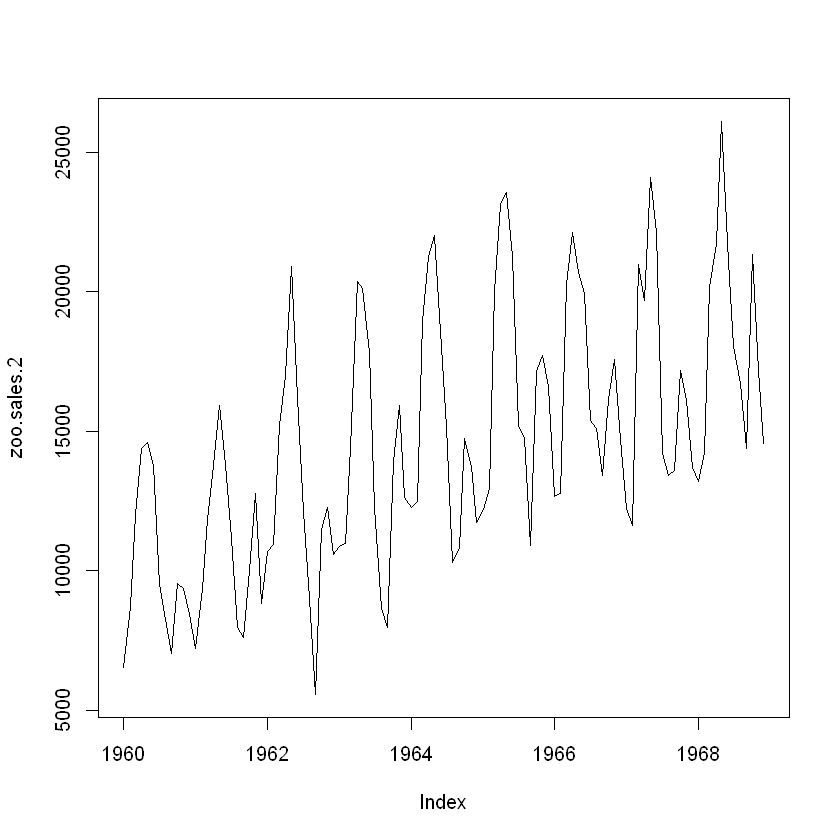

In [46]:
plot(zoo.sales.2)

#### Plotting con ggplot2

In [48]:
#install.packages('ggplot2')
library(ggplot2)

Warning message:
"package 'ggplot2' was built under R version 3.3.3"

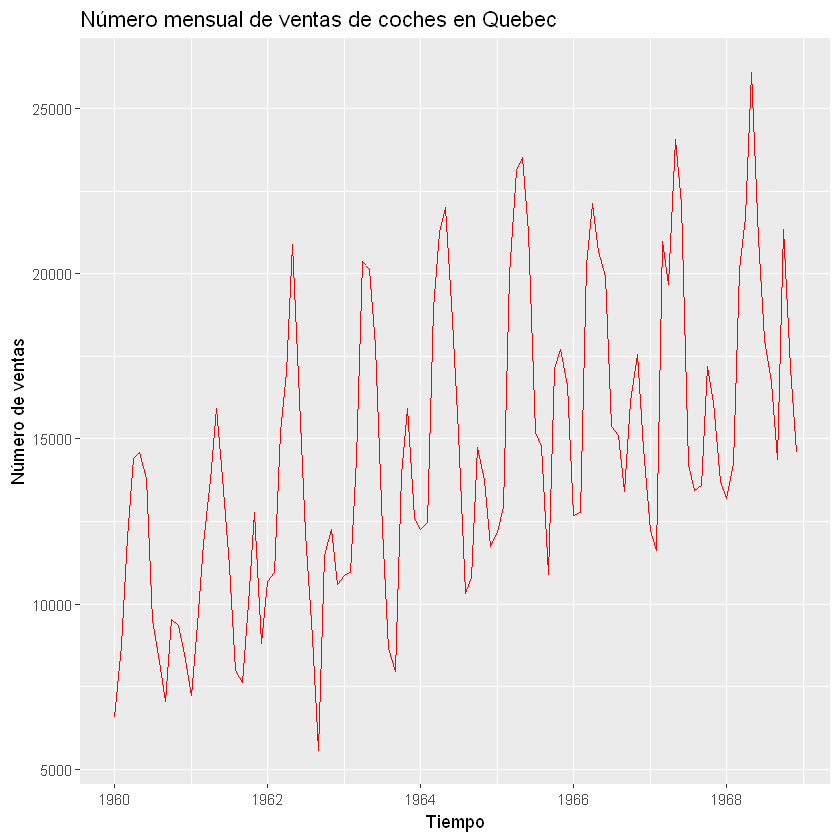

In [49]:
plot <- ggplot() +
  geom_line(aes(x = index(zoo.sales.2), y = coredata(zoo.sales.2)), color = 'red') +
  ggtitle('Número mensual de ventas de coches en Quebec') + xlab('Tiempo') +
  ylab('Número de ventas') 
plot

#### Leyendo con read.csv.zoo

In [52]:
readzoo.sales <- read.csv.zoo(file = './monthly-car-sales-in-quebec-1960.csv',
                              FUN = as.yearmon)
class(readzoo.sales)

[1] "zoo"

In [53]:
readzoo.sales

ene. 1960 feb. 1960 mar. 1960 abr. 1960 may. 1960 jun. 1960 jul. 1960 ago. 1960 
     6550      8728     12026     14395     14587     13791      9498      8251 
sep. 1960 oct. 1960 nov. 1960 dic. 1960 ene. 1961 feb. 1961 mar. 1961 abr. 1961 
     7049      9545      9364      8456      7237      9374     11837     13784 
may. 1961 jun. 1961 jul. 1961 ago. 1961 sep. 1961 oct. 1961 nov. 1961 dic. 1961 
    15926     13821     11143      7975      7610     10015     12759      8816 
ene. 1962 feb. 1962 mar. 1962 abr. 1962 may. 1962 jun. 1962 jul. 1962 ago. 1962 
    10677     10947     15200     17010     20900     16205     12143      8997 
sep. 1962 oct. 1962 nov. 1962 dic. 1962 ene. 1963 feb. 1963 mar. 1963 abr. 1963 
     5568     11474     12256     10583     10862     10965     14405     20379 
may. 1963 jun. 1963 jul. 1963 ago. 1963 sep. 1963 oct. 1963 nov. 1963 dic. 1963 
    20128     17816     12268      8642      7962     13932     15936     12628 
ene. 1964 feb. 1964 mar. 196

#### Aplicando funciones a nuestra serie

In [54]:
rollapply(data = readzoo.sales, width = 5, FUN = mean, align = 'right')

may. 1960 jun. 1960 jul. 1960 ago. 1960 sep. 1960 oct. 1960 nov. 1960 dic. 1960 
  11257.2   12705.4   12859.4   12104.4   10635.2    9626.8    8741.4    8533.0 
ene. 1961 feb. 1961 mar. 1961 abr. 1961 may. 1961 jun. 1961 jul. 1961 ago. 1961 
   8330.2    8795.2    9253.6   10137.6   11631.6   12948.4   13302.2   12529.8 
sep. 1961 oct. 1961 nov. 1961 dic. 1961 ene. 1962 feb. 1962 mar. 1962 abr. 1962 
  11295.0   10112.8    9900.4    9435.0    9975.4   10642.8   11679.8   12530.0 
may. 1962 jun. 1962 jul. 1962 ago. 1962 sep. 1962 oct. 1962 nov. 1962 dic. 1962 
  14946.8   16052.4   16291.6   15051.0   12762.6   10877.4   10087.6    9775.6 
ene. 1963 feb. 1963 mar. 1963 abr. 1963 may. 1963 jun. 1963 jul. 1963 ago. 1963 
  10148.6   11228.0   11814.2   13438.8   15347.8   16738.6   16999.2   15846.6 
sep. 1963 oct. 1963 nov. 1963 dic. 1963 ene. 1964 feb. 1964 mar. 1964 abr. 1964 
  13363.2   12124.0   11748.0   11820.0   12545.0   13446.6   14449.0   15513.6 
may. 1964 jun. 1964 jul. 196

In [55]:
rollapply(data = readzoo.sales, width = 10, FUN = sd, align = 'right')

oct. 1960 nov. 1960 dic. 1960 ene. 1961 feb. 1961 mar. 1961 abr. 1961 may. 1961 
 3029.966  2745.679  2768.892  2923.185  2530.745  2045.412  2043.758  2896.969 
jun. 1961 jul. 1961 ago. 1961 sep. 1961 oct. 1961 nov. 1961 dic. 1961 ene. 1962 
 3037.792  2763.673  2899.828  3051.576  2961.772  2713.033  2765.128  2767.626 
feb. 1962 mar. 1962 abr. 1962 may. 1962 jun. 1962 jul. 1962 ago. 1962 sep. 1962 
 2620.821  2474.200  3035.008  4309.830  4199.704  3774.757  3890.165  4612.316 
oct. 1962 nov. 1962 dic. 1962 ene. 1963 feb. 1963 mar. 1963 abr. 1963 may. 1963 
 4440.442  4379.792  4400.859  4377.325  4109.843  2873.475  3808.709  4642.868 
jun. 1963 jul. 1963 ago. 1963 sep. 1963 oct. 1963 nov. 1963 dic. 1963 ene. 1964 
 4727.333  3887.259  4192.135  4573.857  4465.930  4390.739  4282.947  4336.234 
feb. 1964 mar. 1964 abr. 1964 may. 1964 jun. 1964 jul. 1964 ago. 1964 sep. 1964 
 3767.073  3544.305  4148.867  4874.594  4524.230  3664.627  4082.774  4397.770 
oct. 1964 nov. 1964 dic. 196

In [56]:
rollapply(data = readzoo.sales, width = 12, FUN = mean, align = 'right', by = 12) 

dic. 1960 dic. 1961 dic. 1962 dic. 1963 dic. 1964 dic. 1965 dic. 1966 dic. 1967 
 10186.67  10858.08  12663.33  13826.92  15171.08  17111.50  16728.92  16581.33 
dic. 1968 
 18228.17 

#### Aplicando rollmean

In [57]:
rollmean(x = readzoo.sales, k = 12, align = 'right')

dic. 1960 ene. 1961 feb. 1961 mar. 1961 abr. 1961 may. 1961 jun. 1961 jul. 1961 
 10186.67  10243.92  10297.75  10282.00  10231.08  10342.67  10345.17  10482.25 
ago. 1961 sep. 1961 oct. 1961 nov. 1961 dic. 1961 ene. 1962 feb. 1962 mar. 1962 
 10459.25  10506.00  10545.17  10828.08  10858.08  11144.75  11275.83  11556.08 
abr. 1962 may. 1962 jun. 1962 jul. 1962 ago. 1962 sep. 1962 oct. 1962 nov. 1962 
 11824.92  12239.42  12438.08  12521.42  12606.58  12436.42  12558.00  12516.08 
dic. 1962 ene. 1963 feb. 1963 mar. 1963 abr. 1963 may. 1963 jun. 1963 jul. 1963 
 12663.33  12678.75  12680.25  12614.00  12894.75  12830.42  12964.67  12975.08 
ago. 1963 sep. 1963 oct. 1963 nov. 1963 dic. 1963 ene. 1964 feb. 1964 mar. 1964 
 12945.50  13145.00  13349.83  13656.50  13826.92  13944.00  14069.42  14447.67 
abr. 1964 may. 1964 jun. 1964 jul. 1964 ago. 1964 sep. 1964 oct. 1964 nov. 1964 
 14521.00  14678.25  14742.00  14984.25  15122.92  15358.75  15427.08  15245.25 
dic. 1964 ene. 1965 feb. 196

In [58]:
rollapply(data = readzoo.sales, width = 12, FUN = mean, align = 'right')

dic. 1960 ene. 1961 feb. 1961 mar. 1961 abr. 1961 may. 1961 jun. 1961 jul. 1961 
 10186.67  10243.92  10297.75  10282.00  10231.08  10342.67  10345.17  10482.25 
ago. 1961 sep. 1961 oct. 1961 nov. 1961 dic. 1961 ene. 1962 feb. 1962 mar. 1962 
 10459.25  10506.00  10545.17  10828.08  10858.08  11144.75  11275.83  11556.08 
abr. 1962 may. 1962 jun. 1962 jul. 1962 ago. 1962 sep. 1962 oct. 1962 nov. 1962 
 11824.92  12239.42  12438.08  12521.42  12606.58  12436.42  12558.00  12516.08 
dic. 1962 ene. 1963 feb. 1963 mar. 1963 abr. 1963 may. 1963 jun. 1963 jul. 1963 
 12663.33  12678.75  12680.25  12614.00  12894.75  12830.42  12964.67  12975.08 
ago. 1963 sep. 1963 oct. 1963 nov. 1963 dic. 1963 ene. 1964 feb. 1964 mar. 1964 
 12945.50  13145.00  13349.83  13656.50  13826.92  13944.00  14069.42  14447.67 
abr. 1964 may. 1964 jun. 1964 jul. 1964 ago. 1964 sep. 1964 oct. 1964 nov. 1964 
 14521.00  14678.25  14742.00  14984.25  15122.92  15358.75  15427.08  15245.25 
dic. 1964 ene. 1965 feb. 196

#### Comparando tiempos entre rollmean y rollapply

In [62]:
data <- zoo(rnorm(100000, 200, 20))
#rollmean(x = data, k = 12, align = 'right') == rollapply(data = data, width = 12, FUN = mean, align = 'right') # TRUE

In [71]:
system.time(rollmean(x = data, k = 12, align = 'right'))

   user  system elapsed 
   0.25    0.00    0.25 

In [72]:
system.time(rollapply(data = data, width = 12, FUN = mean, align = 'right'))

   user  system elapsed 
   0.20    0.00    0.22 

<br>

### XTS Package

In [73]:
#install.packages('xts')
library(xts)

Warning message:
"package 'xts' was built under R version 3.3.3"

#### Creando el objeto xts con yearmon

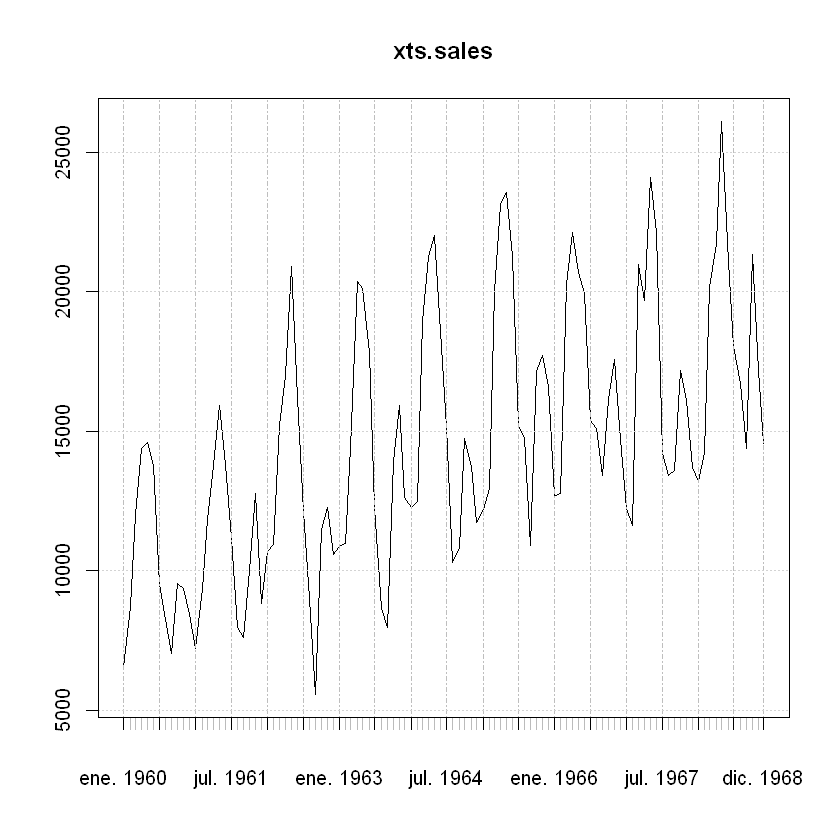

In [76]:
xts.sales <- xts(x = sales$Car.Sales, order.by = yearmon(1960 + seq(0, 107)/12))
plot(xts.sales)

#### Conversión a xts desde ts

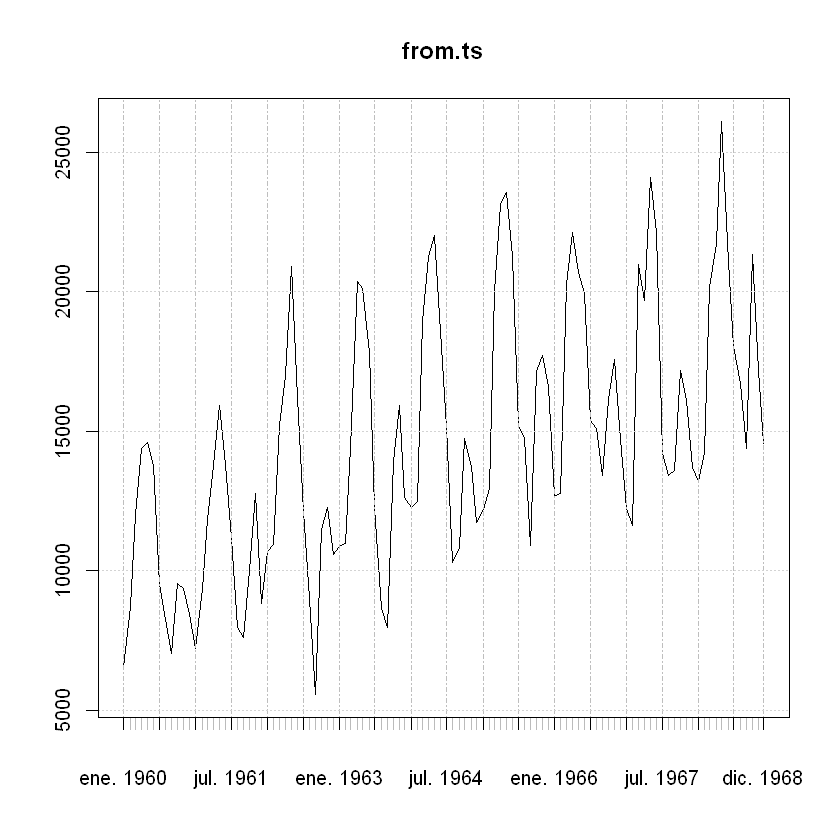

In [77]:
from.ts <- as.xts(ts(sales$Car.Sales, start = c(1960,1), frequency = 12))
plot(from.ts)

####  Conversion a xts desde zoo

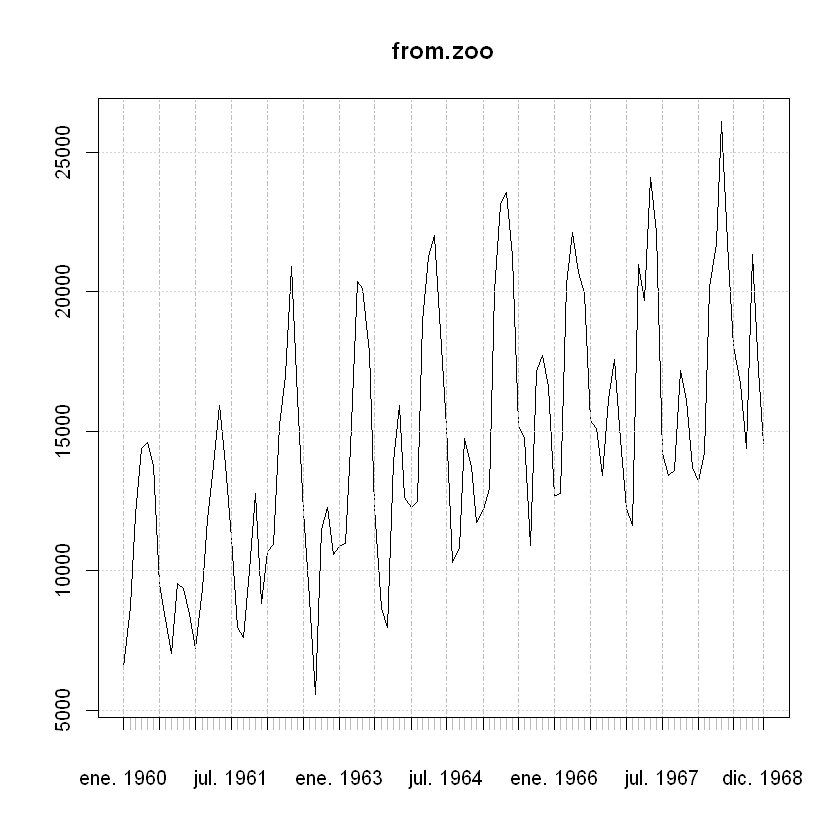

In [78]:
from.zoo <- as.xts(zoo(sales$Car.Sales,
                       order.by = yearmon(1960 + seq(0, 107)/12)))
plot(from.zoo)

#### Conversion a xts desde timeSeries

In [79]:
#install.packages('timeSeries')
library(timeSeries)

Warning message:
"package 'timeSeries' was built under R version 3.3.3"Loading required package: timeDate

Attaching package: 'timeSeries'

The following object is masked from 'package:zoo':

    time<-



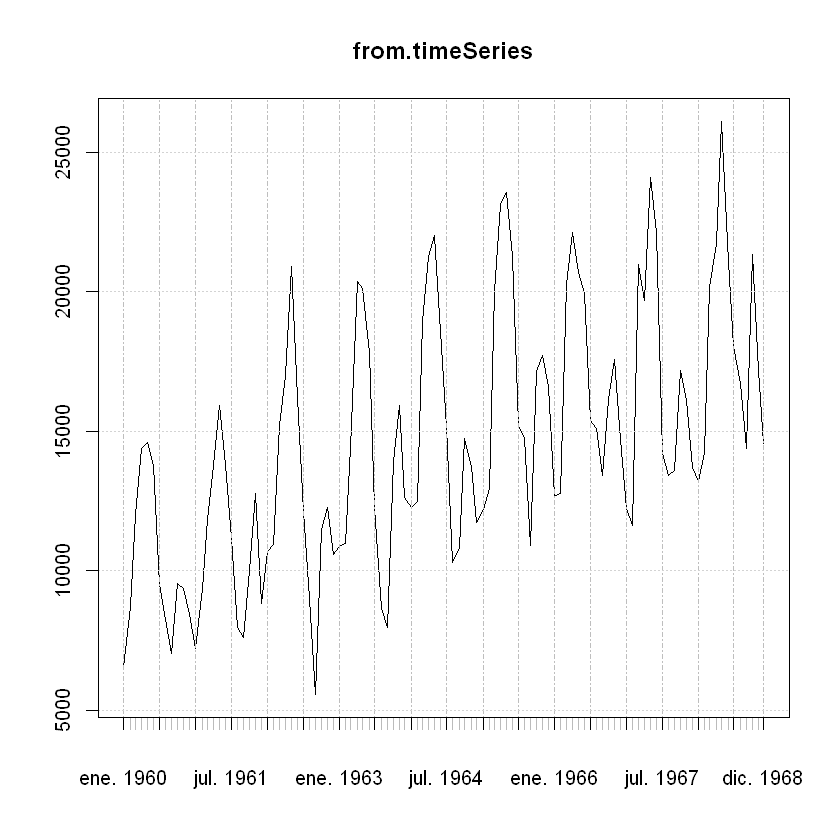

In [80]:
from.timeSeries <- as.xts(
  timeSeries(charvec = seq.Date(from = as.Date('1960-01-01'), to = as.Date('1968-12-01'), by = 'month'),
             data = sales$Car.Sales))
plot(from.timeSeries)

#### Conversion a xts desde matrix

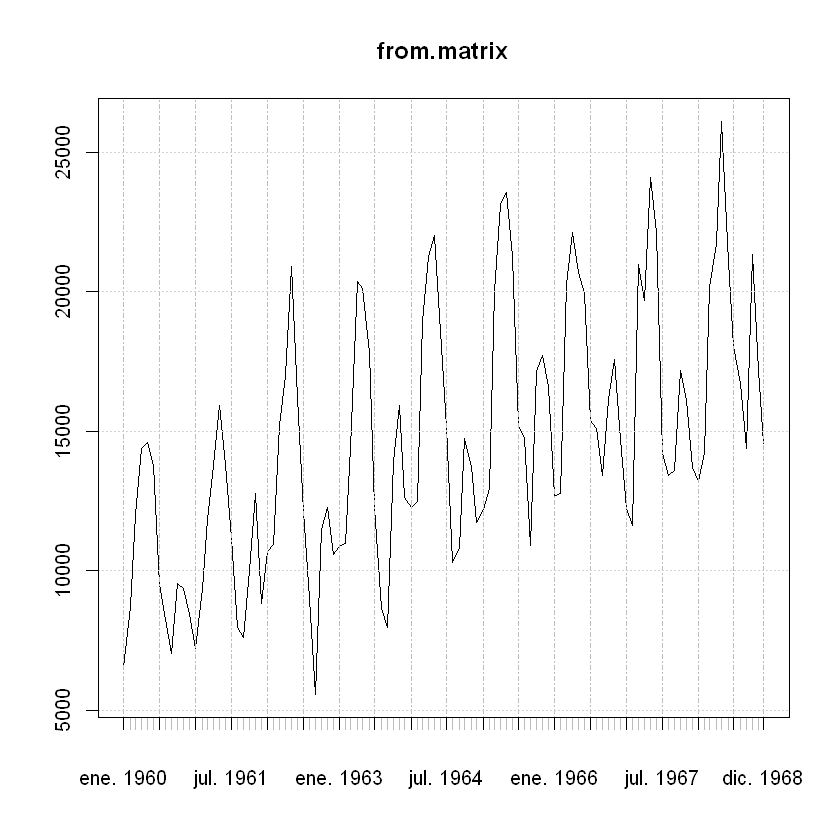

In [81]:
from.matrix <- as.xts(x = matrix(data = sales$Car.Sales, ncol = 1),
       order.by = yearmon(1960 + seq(0, 107)/12))
plot(from.matrix)

#### Conversion a xts desde data.frame 

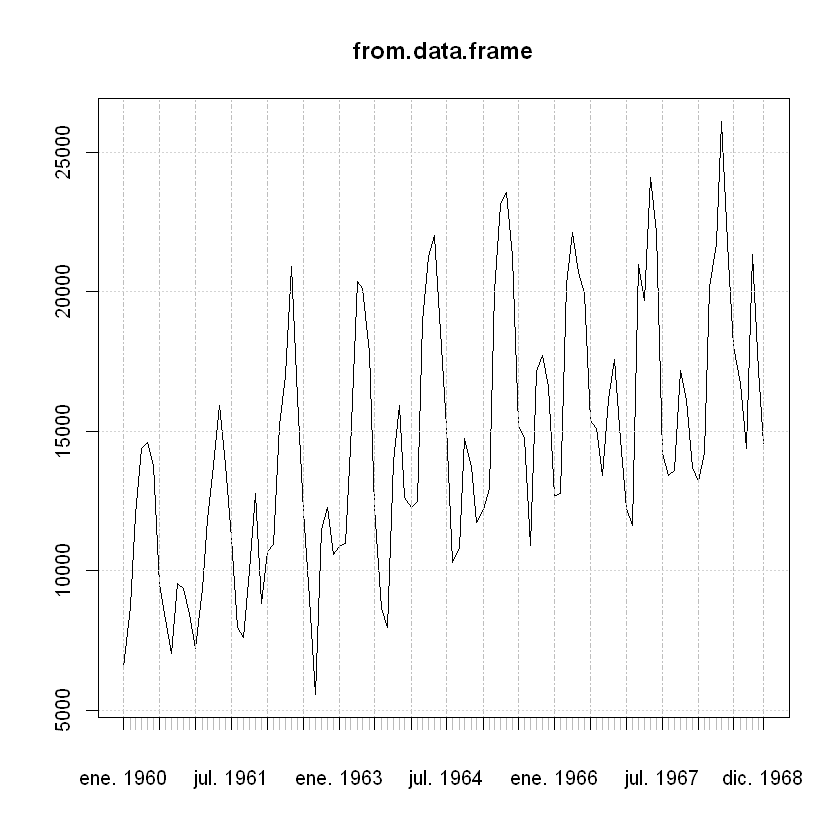

In [82]:
from.data.frame <- as.xts(x = data.frame(x = sales$Car.Sales), order.by = yearmon(1960 + seq(0, 107)/12))
plot(from.data.frame)

#### Subsetting de observaciones

In [83]:
xts.sales['1963-12'] # diciembre de 1963

           [,1]
dic. 1963 12628

In [84]:
xts.sales['1963'] # el año completo de 1963

           [,1]
ene. 1963 10862
feb. 1963 10965
mar. 1963 14405
abr. 1963 20379
may. 1963 20128
jun. 1963 17816
jul. 1963 12268
ago. 1963  8642
sep. 1963  7962
oct. 1963 13932
nov. 1963 15936
dic. 1963 12628

In [85]:
xts.sales['/1963-7'] # todas las observaciones hasta julio de 1963

           [,1]
ene. 1960  6550
feb. 1960  8728
mar. 1960 12026
abr. 1960 14395
may. 1960 14587
jun. 1960 13791
jul. 1960  9498
ago. 1960  8251
sep. 1960  7049
oct. 1960  9545
nov. 1960  9364
dic. 1960  8456
ene. 1961  7237
feb. 1961  9374
mar. 1961 11837
abr. 1961 13784
may. 1961 15926
jun. 1961 13821
jul. 1961 11143
ago. 1961  7975
sep. 1961  7610
oct. 1961 10015
nov. 1961 12759
dic. 1961  8816
ene. 1962 10677
feb. 1962 10947
mar. 1962 15200
abr. 1962 17010
may. 1962 20900
jun. 1962 16205
jul. 1962 12143
ago. 1962  8997
sep. 1962  5568
oct. 1962 11474
nov. 1962 12256
dic. 1962 10583
ene. 1963 10862
feb. 1963 10965
mar. 1963 14405
abr. 1963 20379
may. 1963 20128
jun. 1963 17816
jul. 1963 12268

In [86]:
xts.sales['1963-7/'] # todas las observaciones a partir de julio de 1963

           [,1]
jul. 1963 12268
ago. 1963  8642
sep. 1963  7962
oct. 1963 13932
nov. 1963 15936
dic. 1963 12628
ene. 1964 12267
feb. 1964 12470
mar. 1964 18944
abr. 1964 21259
may. 1964 22015
jun. 1964 18581
jul. 1964 15175
ago. 1964 10306
sep. 1964 10792
oct. 1964 14752
nov. 1964 13754
dic. 1964 11738
ene. 1965 12181
feb. 1965 12965
mar. 1965 19990
abr. 1965 23125
may. 1965 23541
jun. 1965 21247
jul. 1965 15189
ago. 1965 14767
sep. 1965 10895
oct. 1965 17130
nov. 1965 17697
dic. 1965 16611
ene. 1966 12674
feb. 1966 12760
mar. 1966 20249
abr. 1966 22135
may. 1966 20677
jun. 1966 19933
jul. 1966 15388
ago. 1966 15113
sep. 1966 13401
oct. 1966 16135
nov. 1966 17562
dic. 1966 14720
ene. 1967 12225
feb. 1967 11608
mar. 1967 20985
abr. 1967 19692
may. 1967 24081
jun. 1967 22114
jul. 1967 14220
ago. 1967 13434
sep. 1967 13598
oct. 1967 17187
nov. 1967 16119
dic. 1967 13713
ene. 1968 13210
feb. 1968 14251
mar. 1968 20139
abr. 1968 21725
may. 1968 26099
jun. 1968 21084
jul. 1968 18024
ago. 196

In [87]:
xts.sales['1962-7/1963-7'] # todas las observaciones comprendidas entre julio de 1962 y de 1963

           [,1]
jul. 1962 12143
ago. 1962  8997
sep. 1962  5568
oct. 1962 11474
nov. 1962 12256
dic. 1962 10583
ene. 1963 10862
feb. 1963 10965
mar. 1963 14405
abr. 1963 20379
may. 1963 20128
jun. 1963 17816
jul. 1963 12268

#### Ejemplo de métodos de zoo que funcionan en xts

In [89]:
head(coredata(xts.sales))

6550
8728
12026
14395
14587
13791


In [90]:
index(xts.sales)

  [1] "ene. 1960" "feb. 1960" "mar. 1960" "abr. 1960" "may. 1960" "jun. 1960"
  [7] "jul. 1960" "ago. 1960" "sep. 1960" "oct. 1960" "nov. 1960" "dic. 1960"
 [13] "ene. 1961" "feb. 1961" "mar. 1961" "abr. 1961" "may. 1961" "jun. 1961"
 [19] "jul. 1961" "ago. 1961" "sep. 1961" "oct. 1961" "nov. 1961" "dic. 1961"
 [25] "ene. 1962" "feb. 1962" "mar. 1962" "abr. 1962" "may. 1962" "jun. 1962"
 [31] "jul. 1962" "ago. 1962" "sep. 1962" "oct. 1962" "nov. 1962" "dic. 1962"
 [37] "ene. 1963" "feb. 1963" "mar. 1963" "abr. 1963" "may. 1963" "jun. 1963"
 [43] "jul. 1963" "ago. 1963" "sep. 1963" "oct. 1963" "nov. 1963" "dic. 1963"
 [49] "ene. 1964" "feb. 1964" "mar. 1964" "abr. 1964" "may. 1964" "jun. 1964"
 [55] "jul. 1964" "ago. 1964" "sep. 1964" "oct. 1964" "nov. 1964" "dic. 1964"
 [61] "ene. 1965" "feb. 1965" "mar. 1965" "abr. 1965" "may. 1965" "jun. 1965"
 [67] "jul. 1965" "ago. 1965" "sep. 1965" "oct. 1965" "nov. 1965" "dic. 1965"
 [73] "ene. 1966" "feb. 1966" "mar. 1966" "abr. 1966" "may. 1966

In [91]:
merge.zoo(xts.sales, xts.sales)

          xts.sales xts.sales
ene. 1960      6550      6550
feb. 1960      8728      8728
mar. 1960     12026     12026
abr. 1960     14395     14395
may. 1960     14587     14587
jun. 1960     13791     13791
jul. 1960      9498      9498
ago. 1960      8251      8251
sep. 1960      7049      7049
oct. 1960      9545      9545
nov. 1960      9364      9364
dic. 1960      8456      8456
ene. 1961      7237      7237
feb. 1961      9374      9374
mar. 1961     11837     11837
abr. 1961     13784     13784
may. 1961     15926     15926
jun. 1961     13821     13821
jul. 1961     11143     11143
ago. 1961      7975      7975
sep. 1961      7610      7610
oct. 1961     10015     10015
nov. 1961     12759     12759
dic. 1961      8816      8816
ene. 1962     10677     10677
feb. 1962     10947     10947
mar. 1962     15200     15200
abr. 1962     17010     17010
may. 1962     20900     20900
jun. 1962     16205     16205
jul. 1962     12143     12143
ago. 1962      8997      8997
sep. 1962 

In [92]:
xts.sales.nas <- as.xts(zoo.sales.nas)
na.locf(xts.sales.nas)

            [,1]
1959-06-01    NA
1959-07-01    NA
1959-08-01    NA
1959-09-01    NA
1959-10-01    NA
1959-11-01    NA
1959-12-01  6550
1960-01-01  8728
1960-02-01 12026
1960-03-01 14395
1960-04-01 14587
1960-05-01 13791
1960-06-01  9498
1960-07-01  8251
1960-08-01  7049
1960-09-01  9545
1960-10-01  9364
1960-11-01  8456
1960-12-01  7237
1961-01-01  9374
1961-02-01 11837
1961-03-01 13784
1961-04-01 15926
1961-05-01 13821
1961-06-01 11143
1961-07-01  7975
1961-08-01  7610
1961-09-01 10015
1961-10-01 12759
1961-11-01  8816
1961-12-01 10677
1962-01-01 10947
1962-02-01 15200
1962-03-01 17010
1962-04-01 20900
1962-05-01 16205
1962-06-01 12143
1962-07-01  8997
1962-08-01  5568
1962-09-01 11474
1962-10-01 12256
1962-11-01 10583
1962-12-01 10862
1963-01-01 10965
1963-02-01 14405
1963-03-01 20379
1963-04-01 20128
1963-05-01 17816
1963-06-01 12268
1963-07-01  8642
1963-08-01  7962
1963-09-01 13932
1963-10-01 15936
1963-11-01 12628
1963-12-01 12267
1964-01-01 12470
1964-02-01 18944
1964-03-01 212

In [93]:
rollmean(x = xts.sales, k = 12, align = 'right')

              [,1]
dic. 1960 10186.67
ene. 1961 10243.92
feb. 1961 10297.75
mar. 1961 10282.00
abr. 1961 10231.08
may. 1961 10342.67
jun. 1961 10345.17
jul. 1961 10482.25
ago. 1961 10459.25
sep. 1961 10506.00
oct. 1961 10545.17
nov. 1961 10828.08
dic. 1961 10858.08
ene. 1962 11144.75
feb. 1962 11275.83
mar. 1962 11556.08
abr. 1962 11824.92
may. 1962 12239.42
jun. 1962 12438.08
jul. 1962 12521.42
ago. 1962 12606.58
sep. 1962 12436.42
oct. 1962 12558.00
nov. 1962 12516.08
dic. 1962 12663.33
ene. 1963 12678.75
feb. 1963 12680.25
mar. 1963 12614.00
abr. 1963 12894.75
may. 1963 12830.42
jun. 1963 12964.67
jul. 1963 12975.08
ago. 1963 12945.50
sep. 1963 13145.00
oct. 1963 13349.83
nov. 1963 13656.50
dic. 1963 13826.92
ene. 1964 13944.00
feb. 1964 14069.42
mar. 1964 14447.67
abr. 1964 14521.00
may. 1964 14678.25
jun. 1964 14742.00
jul. 1964 14984.25
ago. 1964 15122.92
sep. 1964 15358.75
oct. 1964 15427.08
nov. 1964 15245.25
dic. 1964 15171.08
ene. 1965 15163.92
feb. 1965 15205.17
mar. 1965 15

In [94]:
lag(xts.sales, k = 12, na.pad = TRUE)

           [,1]
ene. 1960    NA
feb. 1960    NA
mar. 1960    NA
abr. 1960    NA
may. 1960    NA
jun. 1960    NA
jul. 1960    NA
ago. 1960    NA
sep. 1960    NA
oct. 1960    NA
nov. 1960    NA
dic. 1960    NA
ene. 1961  6550
feb. 1961  8728
mar. 1961 12026
abr. 1961 14395
may. 1961 14587
jun. 1961 13791
jul. 1961  9498
ago. 1961  8251
sep. 1961  7049
oct. 1961  9545
nov. 1961  9364
dic. 1961  8456
ene. 1962  7237
feb. 1962  9374
mar. 1962 11837
abr. 1962 13784
may. 1962 15926
jun. 1962 13821
jul. 1962 11143
ago. 1962  7975
sep. 1962  7610
oct. 1962 10015
nov. 1962 12759
dic. 1962  8816
ene. 1963 10677
feb. 1963 10947
mar. 1963 15200
abr. 1963 17010
may. 1963 20900
jun. 1963 16205
jul. 1963 12143
ago. 1963  8997
sep. 1963  5568
oct. 1963 11474
nov. 1963 12256
dic. 1963 10583
ene. 1964 10862
feb. 1964 10965
mar. 1964 14405
abr. 1964 20379
may. 1964 20128
jun. 1964 17816
jul. 1964 12268
ago. 1964  8642
sep. 1964  7962
oct. 1964 13932
nov. 1964 15936
dic. 1964 12628
ene. 1965 12267
feb. 196

#### Subserie formada por las medias anuales de xts.sales

In [95]:
subserie.1 <- period.apply(x = xts.sales, INDEX = endpoints(xts.sales, on = 'years'), FUN = mean)
subserie.1[1] == mean(xts.sales['1960']) # TRUE

          [,1]
dic. 1960 TRUE